In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import zscore
import os

In [2]:
#df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df = pd.read_csv("D:/kaimtenx/solar-challenge-week1/data/sierraleone-bumbuna.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
#display the first 5 rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# Summary statistics for numeric columns
summary_stats = df.describe()

In [5]:
# Count missing values
missing_values = df.isna().sum()
# Identify columns with more than 5% missing values
missing_percentage = (missing_values / len(df)) * 100
columns_with_over_5pct_missing = missing_percentage[missing_percentage > 5]
# Print results
print("Summary Statistics:\n", summary_stats)
print("\nMissing Values:\n", missing_values)
print("\nColumns with >5% Missing:\n", columns_with_over_5pct_missing)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [6]:
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example:
outliers_ghi = detect_outliers_iqr("GHI")
outliers_dni = detect_outliers_iqr("DNI")
outliers_dhi = detect_outliers_iqr("DHI")

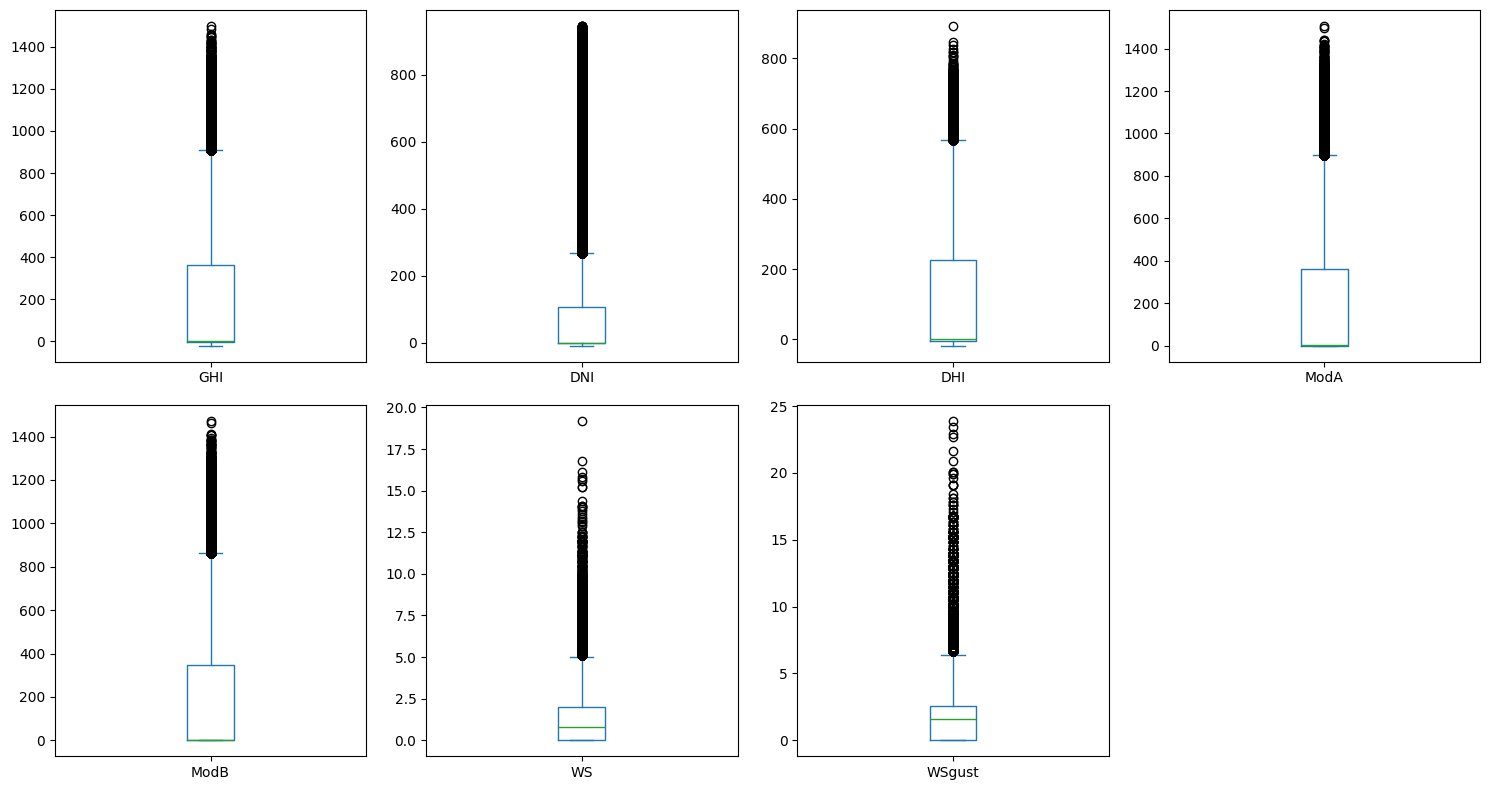

In [17]:
#visualize
columns_to_plot = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[columns_to_plot].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [7]:
#invalid values
invalid_ghi = df[df["GHI"] < 0]
invalid_dni = df[df["DNI"] < 0]
invalid_dhi = df[df["DHI"] < 0]
invalid_ws = df[df["WS"] < 0]  # wind speed can't be negative

In [9]:
# Columns to check
columns_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores only for the specified columns
z_scores = df[columns_to_check].apply(zscore)

# Add z-scores to the original DataFrame (optional)
for col in columns_to_check:
    df[f"{col}_z"] = z_scores[col]

# Flag rows where any |Z| > 3
outlier_mask = (z_scores.abs() > 3).any(axis=1)
outliers = df[outlier_mask]

# Output result
print(f"Total outlier rows: {outliers.shape[0]}")
print(outliers[[col for col in df.columns if col.endswith('_z') or col in columns_to_check]])

Total outlier rows: 16292
          GHI    DNI    DHI   ModA   ModB   WS  WSgust     GHI_z     DNI_z  \
653     814.0  257.0  594.3  878.0  856.0  0.5     1.1  2.050429  0.643138   
654     826.0  263.5  599.6  883.0  861.0  1.7     2.4  2.090631  0.672865   
655     851.0  285.0  605.9  912.0  890.0  1.6     2.1  2.174384  0.771195   
656     823.0  254.8  603.9  878.0  856.0  0.8     1.6  2.080580  0.633076   
657     810.0  244.5  598.8  864.0  843.0  0.6     1.6  2.037028  0.585969   
...       ...    ...    ...    ...    ...  ...     ...       ...       ...   
522184  167.2   -0.5  165.1  167.6  160.9  5.3     6.7 -0.116443 -0.534530   
522185  163.4   -0.6  161.0  165.7  159.2  7.1     8.4 -0.129173 -0.534988   
522194  183.5    0.3  181.6  173.7  168.7  4.9     5.9 -0.061835 -0.530871   
523792   31.3   -0.5   30.2   34.3   32.3  5.0     6.4 -0.571727 -0.534530   
523794   22.8   -0.8   21.4   26.5   25.0  5.0     6.7 -0.600203 -0.535902   

           DHI_z    ModA_z    ModB_z 